## Statistical Coverage Product viewer

This notebook makes timeseries plots of Peter May's Statistical Coverage Product as generated by derive_scp.py

In [33]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates
import numpy as np
%matplotlib inline

Input data path

In [34]:
scp_netcdf_file_path = '/home/rjackson/data/SCP.cdf'

start_time = datetime(2010,1,13,1,0,0)
end_time = datetime(2010,1,15,12,0,0)

Load netCDF variables

In [35]:
scp_netcdf = Dataset(scp_netcdf_file_path, mode='r')
print(scp_netcdf.variables)
SCP0 = scp_netcdf.variables['SCP0'][:]
SCP10 = scp_netcdf.variables['SCP10'][:]
SCP20 = scp_netcdf.variables['SCP20'][:]
SCP30 = scp_netcdf.variables['SCP30'][:]
SCP40 = scp_netcdf.variables['SCP40'][:]
year = scp_netcdf.variables['years'][:]
hour = scp_netcdf.variables['hours'][:]
day = scp_netcdf.variables['days'][:]
minute = scp_netcdf.variables['minutes'][:]
month = scp_netcdf.variables['months'][:]

times1 = [datetime(year[i], month[i], day[i], 
                   hour[i], minute[i],) for i in range(0, len(year))]
z = scp_netcdf.variables['levels'][:]
scp_netcdf.close()

OrderedDict([('levels', <class 'netCDF4._netCDF4.Variable'>
float64 levels(levels)
    long_name: Height in km
    units: km
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('SCP0', <class 'netCDF4._netCDF4.Variable'>
float64 SCP0(time, levels)
    long_name: % of level > 0 dBZ
    units: %
unlimited dimensions: 
current shape = (291031, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('SCP10', <class 'netCDF4._netCDF4.Variable'>
float64 SCP10(time, levels)
    long_name: % of level > 10 dBZ
    units: %
unlimited dimensions: 
current shape = (291031, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('SCP20', <class 'netCDF4._netCDF4.Variable'>
float64 SCP20(time, levels)
    long_name: % of level > 20 dBZ
    units: %
unlimited dimensions: 
current shape = (291031, 40)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('SCP30', <class 'netCDF4._netCDF4.Variable'>
float64 S

Display statistical coverage product

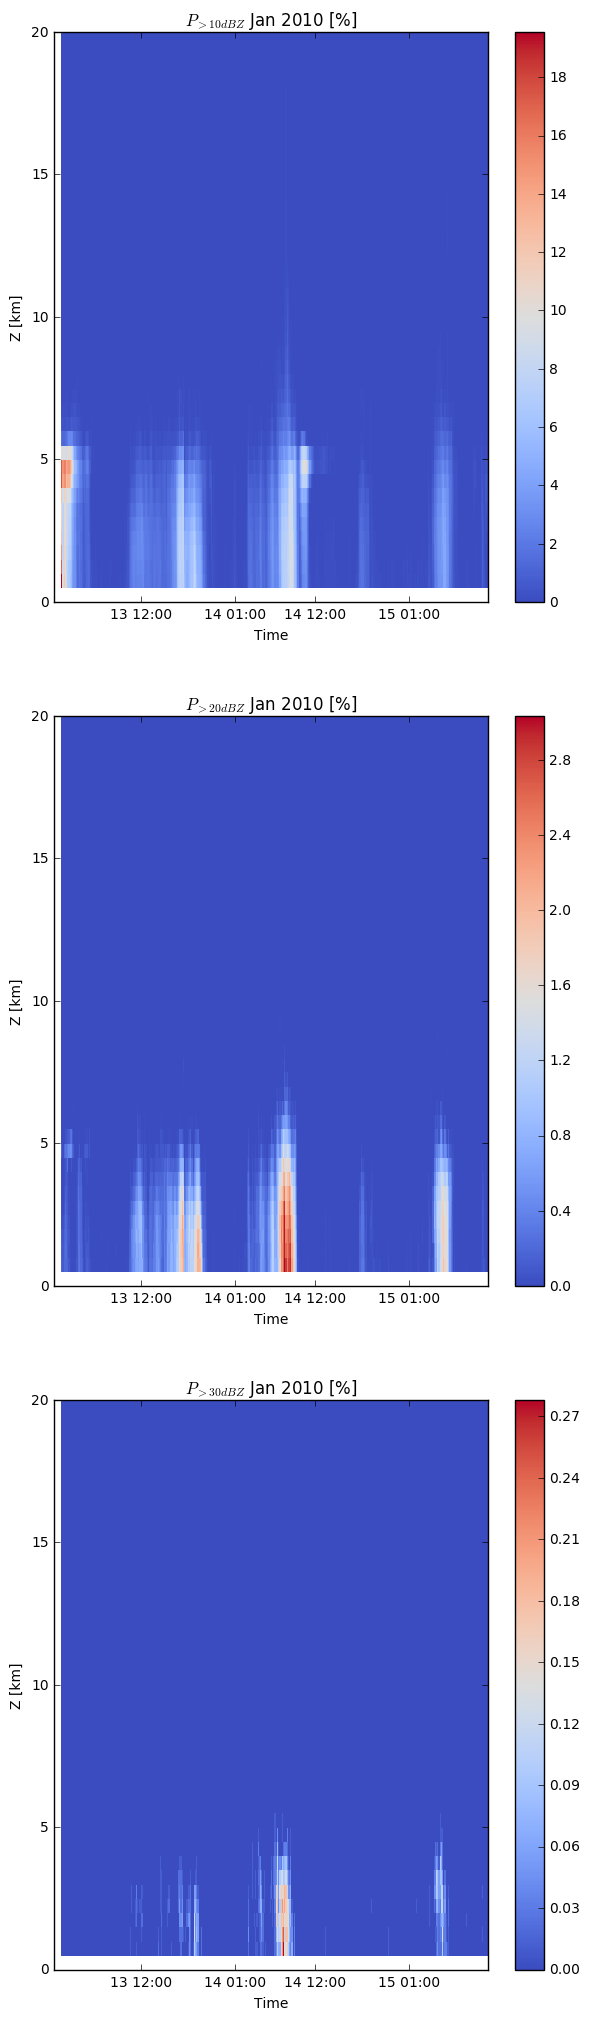

In [40]:
# Convert times to numerical format
datenums = [dates.date2num(the_time) for the_time in times1]

datenums = np.array(datenums)
indicies = [True if b >= dates.date2num(start_time) 
                 and b <= dates.date2num(end_time) else False for b in datenums]

datenums = datenums[np.where(indicies)]

SCP0z = np.squeeze(SCP0[np.where(indicies),:])
SCP10z = np.squeeze(SCP10[np.where(indicies),:])
SCP20z = np.squeeze(SCP20[np.where(indicies),:])
SCP30z = np.squeeze(SCP30[np.where(indicies),:])
SCP40z = np.squeeze(SCP40[np.where(indicies),:])

num_dates = len(datenums)

datelocs = [datetime(2010,1,13,12,0,0),
            datetime(2010,1,14,1,0,0),
            datetime(2010,1,14,12,0,0),
            datetime(2010,1,15,1,0,0)]
x = dates.date2num(datelocs)    

# Create meshgrid for contour plot
times, lvls = np.meshgrid(datenums,z)

contour_levels = [0.1, 0.5, 1, 5, 10,20]
# Plot contour figure
plt.figure(figsize=(7,25))

plt.subplot(311)
CS = plt.pcolormesh(times,lvls,np.transpose(SCP10z), cmap='coolwarm')
plt.gca().set_xticks(x)
cbar = plt.colorbar()
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%d %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('$P_{> 10 dBZ}$ Jan 2010 [%]')

plt.subplot(312)
CS = plt.pcolormesh(times,lvls,np.transpose(SCP20z), cmap='coolwarm')
plt.gca().set_xticks(x)
cbar = plt.colorbar()
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%d %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('$P_{> 20 dBZ}$ Jan 2010 [%]')

plt.subplot(313)
CS = plt.pcolormesh(times,lvls,np.transpose(SCP30z), cmap='coolwarm')
plt.gca().set_xticks(x)
cbar = plt.colorbar()
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%d %H:%M") for date in datelocs])
plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('$P_{> 30 dBZ}$ Jan 2010 [%]')

## Classify time periods into categories

Try to identify five modes: clear air, shallow convection, congestus, deep, stratiform

In [42]:
# Find max height where SCP10 > 0
max_z = np.ma.zeros(len(times))
for i in range(0,len(times)):
    indicies = np.where(SCP10[i,:] > 0)
    if(len(indicies) > 0):
        print(indicies)
        max_z[i] = levels[indicies[-1]]
    else:
        max_z[i].mask = True
    
bins, centers = np.histogram(max_z)
plt.figure
plt.plot(bins,centers)

(array([], dtype=int64),)


NameError: name 'levels' is not defined

In [ ]:
plt.figure
print(SCP10.shape)
number = np.where(SCP20[:,2] > 0.1)
print('# of interesting scans:' + str(number[0].size))

In [ ]:
plt.plot(seconds)